<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Actividad_4/Actividad_4_PobleteGalvez_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


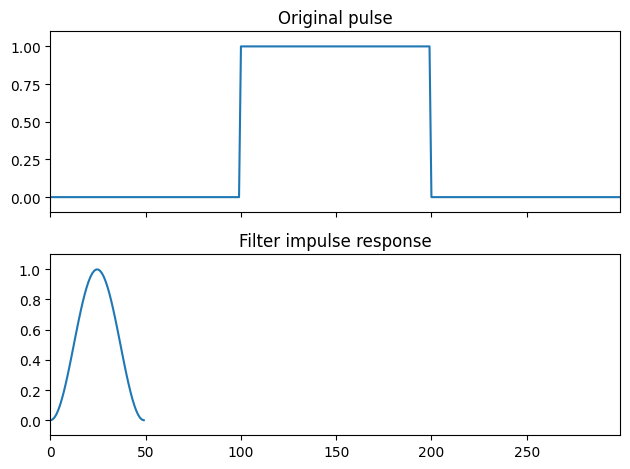

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)


fig, (ax_orig, ax_win) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)

fig.tight_layout()
fig.show()

In [3]:
def convolucion(señal1, señal2):
  largo_señal1=len(señal1)
  largo_señal2 = len(señal2)
  tamaño= largo_señal1-largo_señal2+1
  conv=[0]*tamaño

  for i in range(tamaño):
    for j in range(largo_señal2):
      if i - j >= 0 and i - j < largo_señal1:
        conv[i]+=señal1[i-j]*señal2[j]
  return conv


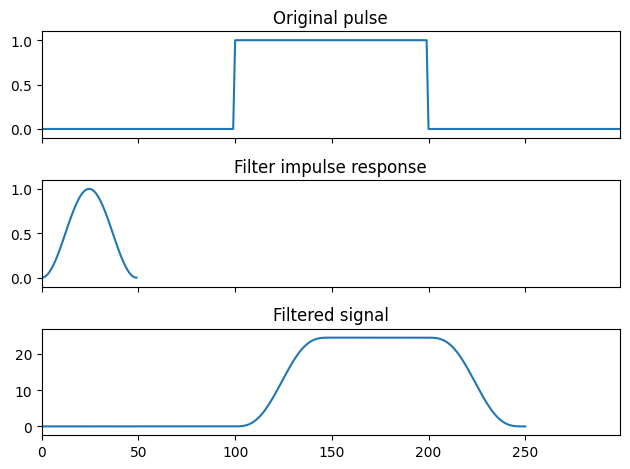

In [4]:
convo= convolucion(sig,win)


fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(convo)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


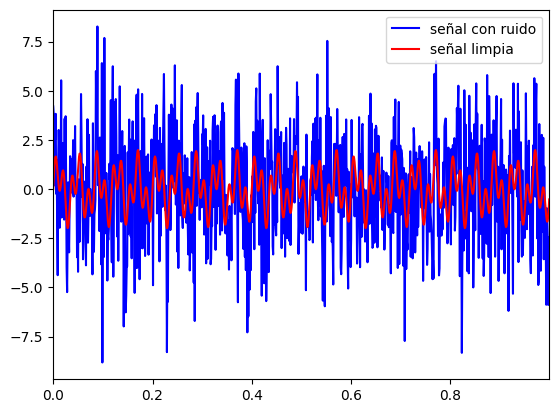

In [5]:
dt=0.001
t=np.arange(0,1,dt)

señal_limpia=np.sin(2*np.pi*25*t)+np.sin(2*np.pi*60*t)
señal_ruido=señal_limpia+2.5*np.random.randn(len(t))


plt.plot(t,señal_ruido,'b',label='señal con ruido')
plt.plot(t,señal_limpia,'r',label='señal limpia')
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1.0, 499.0)

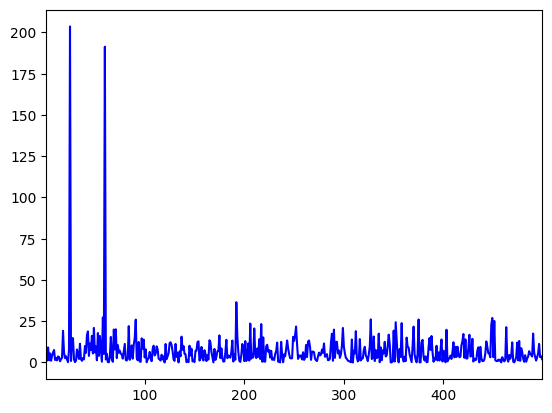

In [9]:
n= len(t)
señal_fft=np.fft.fft(señal_ruido,n)
psd=señal_fft*np.conj(señal_fft)/n
frec=(1/(dt*n))*np.arange(n)
l=np.arange(1,np.floor(n/2),dtype='int')

plt.plot(frec[l],psd[l],'b',label='señal con ruido')
plt.xlim(frec[l[0]],frec[l[-1]])

(1.0, 499.0)

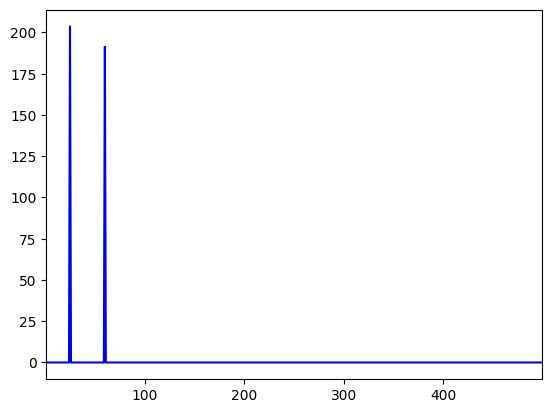

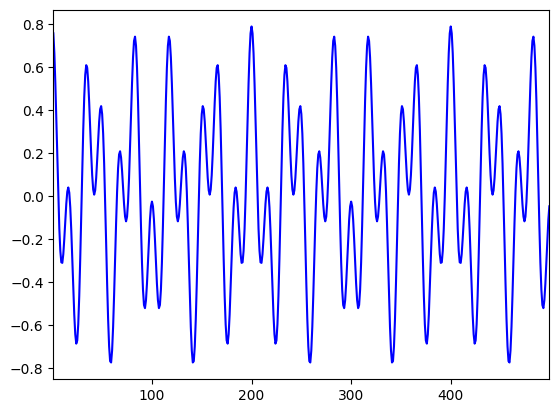

In [18]:
indi= psd>100
psdclean=psd*indi
señal_filtrada = indi*psd
a=np.fft.ifft(señal_filtrada)

plt.plot(frec[l],señal_filtrada[l],'b')
plt.xlim(frec[l[0]],frec[l[-1]])

plt.figure()
plt.plot(frec[l],a[l],'b')
plt.xlim(frec[l[0]],frec[l[-1]])

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
  exp_fuc = np.exp((-x**2)/(2*sigma**2))
  a= (1 -(x/sigma)**2)
  b= 2/(np.sqrt(3*sigma)*np.pi**(1/4))

  m= b*a*exp_fuc

  return m


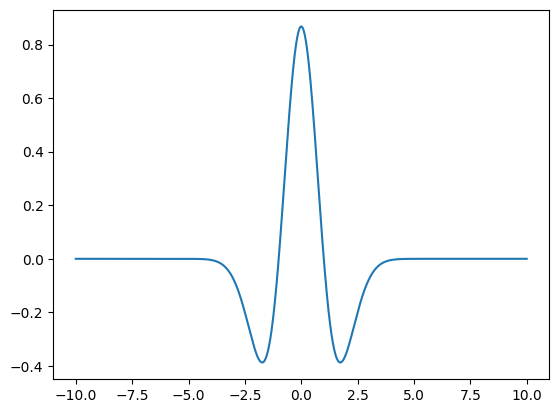

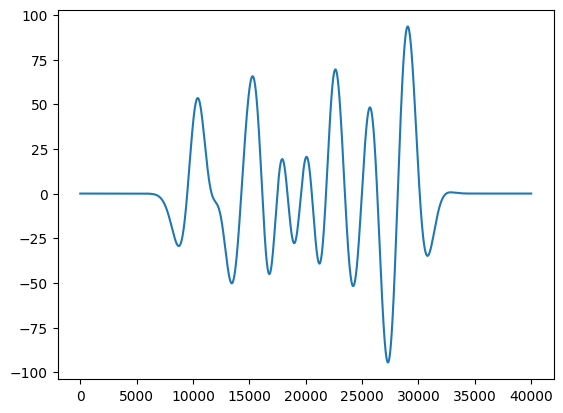

In [ ]:
t = np.arange(-10,10,0.001)

mex= mexican_hat(t,0,1)

señal = np.sin(2*np.pi*25*t)+np.sin(2*np.pi*60*t)+2.5*np.random.randn(len(t))
wav= np.convolve(señal,mex)

plt.plot(t,mex)

plt.figure()
plt.plot(wav)

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

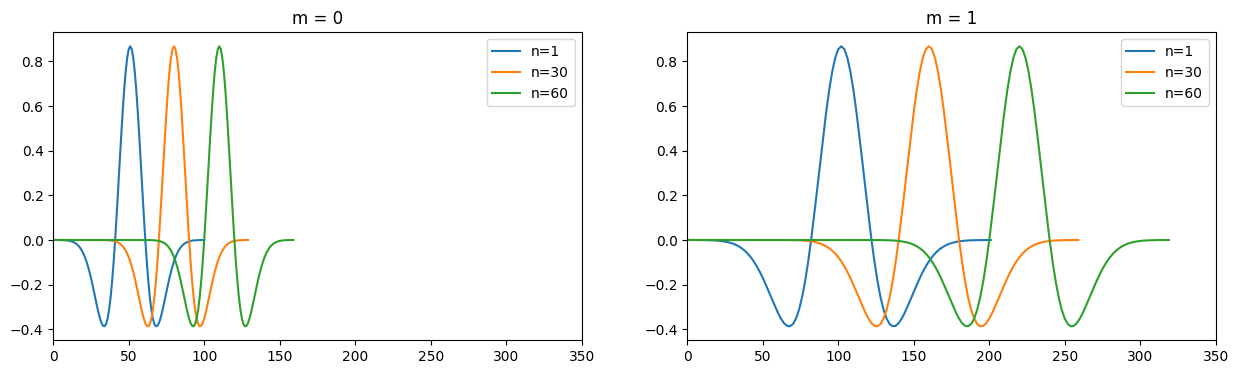

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


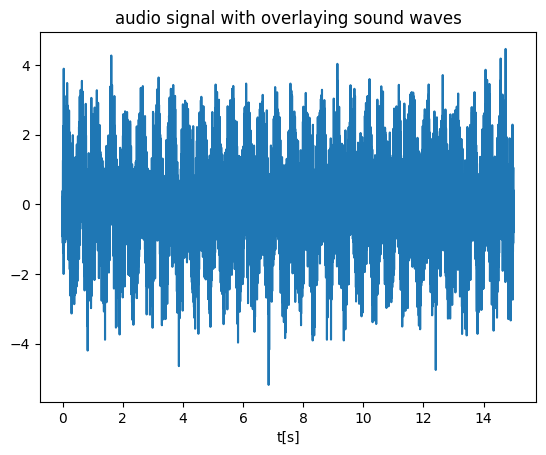

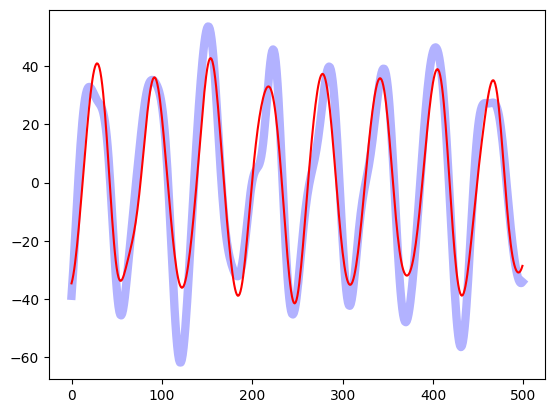

In [ ]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]
    transform_scaled = 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

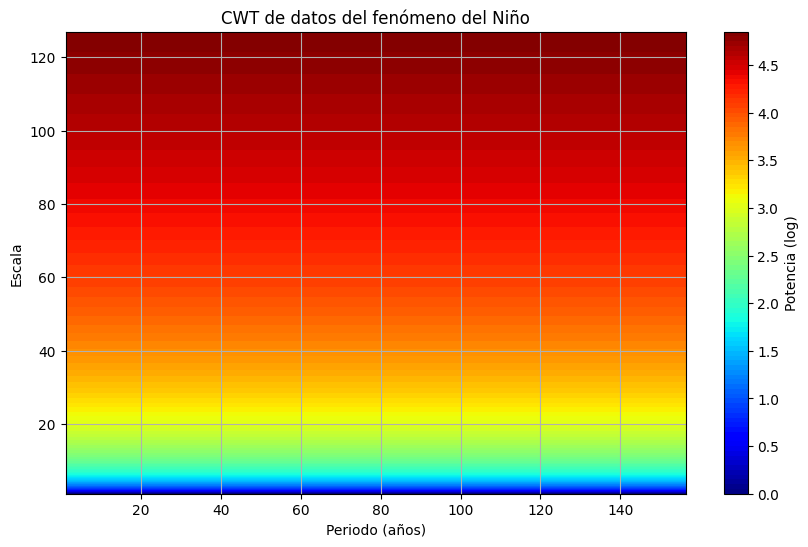

In [8]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat'
data = pd.read_csv(url, header=None, delimiter='\s+')

#coefficients, frequencies = pywt.cwt(data, np.arange(1,len(data)), 'mexh')

scales = np.arange(1, 128)  # Escalas a utilizar en la CWT
coef, freqs = pywt.cwt(data, scales, 'morl')

# Calcular la potencia de los coeficientes de la transformación
power = (abs(coef)) ** 2

# Crear una malla de periodos y frecuencias
period = 1. / freqs
period, power = np.meshgrid(period, scales)

# Graficar el resultado en términos de potencia
plt.figure(figsize=(10, 6))
plt.contourf(period, power, np.log(power), levels=100, cmap='jet')
plt.colorbar(label='Potencia (log)')
plt.xlabel('Periodo (años)')
plt.ylabel('Escala')
plt.title('CWT de datos del fenómeno del Niño')
plt.grid()
plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/